<a href="https://colab.research.google.com/github/ProfessionalYapper0311/Skolar-FSWD/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [2]:
!pip install transformers

In [3]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
text = "Natural Language Processing is a key area in AI that improves human-computer interactions."
clean_text = re.sub(r'[^\w\s]', '', text.lower())
tokens = word_tokenize(clean_text)
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['natural', 'language', 'processing', 'key', 'area', 'ai', 'improves', 'humancomputer', 'interactions']


In [6]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_words = [stemmer.stem(word) for word in filtered_tokens]
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)

Stemmed Words: ['natur', 'languag', 'process', 'key', 'area', 'ai', 'improv', 'humancomput', 'interact']
Lemmatized Words: ['natural', 'language', 'processing', 'key', 'area', 'ai', 'improves', 'humancomputer', 'interaction']


In [7]:
corpus = ["NLP enables AI to process human language.", "Machine learning improves NLP models.", "AI transforms text analysis."]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

print("TF-IDF Features:", vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

TF-IDF Features: ['ai' 'analysis' 'enables' 'human' 'improves' 'language' 'learning'
 'machine' 'models' 'nlp' 'process' 'text' 'transforms']
TF-IDF Matrix:
 [[0.3349067  0.         0.44036207 0.44036207 0.         0.44036207
  0.         0.         0.         0.3349067  0.44036207 0.
  0.        ]
 [0.         0.         0.         0.         0.46735098 0.
  0.46735098 0.46735098 0.46735098 0.35543247 0.         0.
  0.        ]
 [0.40204024 0.52863461 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.52863461
  0.52863461]]


In [8]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(text)
sentiment = "Positive" if sentiment_scores['compound'] > 0 else "Negative" if sentiment_scores['compound'] < 0 else "Neutral"

print("Sentiment:", sentiment, sentiment_scores)

Sentiment: Positive {'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.6486}


In [10]:
generator = pipeline("text-generation", model="gpt2")
generated_text = generator("AI is revolutionizing", max_length=50, num_return_sequences=1)[0]['generated_text']

print("Generated Text:", generated_text)

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: AI is revolutionizing information processing with an AI that can be deployed and communicated to a large mass audience.

"AI-powered information processing is an emerging strategy in the field of robotics and smart appliances," said Mike Davis, director of the S


<ipython-input-11-0834a06f33d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word for word, _ in fd.most_common(10)], y=[freq for _, freq in fd.most_common(10)], palette="magma")


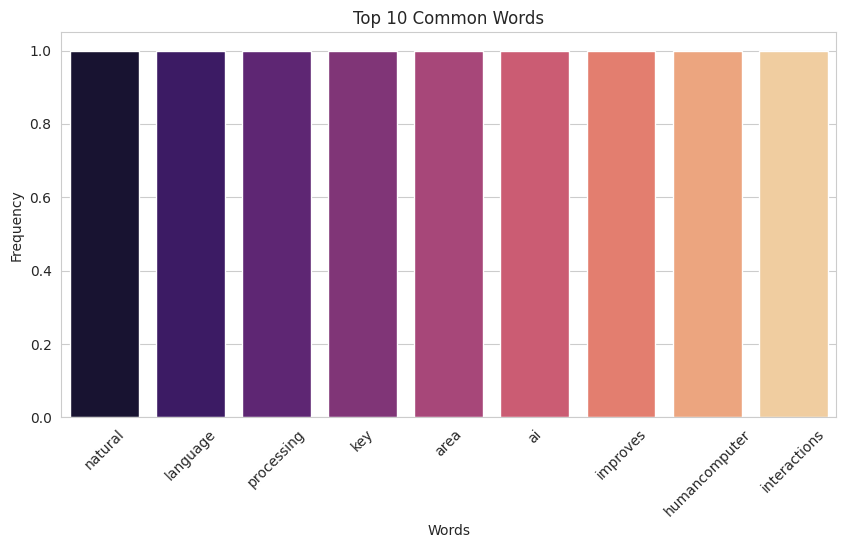

In [11]:
fd = FreqDist(filtered_tokens)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=[word for word, _ in fd.most_common(10)], y=[freq for _, freq in fd.most_common(10)], palette="magma")
plt.title("Top 10 Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()